<h1 style="color:orange">Plotting LiDAR</h1>
<h2 style="color:green">MATPLOTLIB 3D</h2>

<hr>

<img src="plot3d.png" width="500"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import *

%matplotlib widget

In [2]:
file_path = "LiDAR_PCD/cleaned_nicholas_scene.csv"
df = pd.read_csv(file_path)
df = df[df['X1 (m)'] != 0]
df = df[df['Y1 (m)'] != 0]
df = df[df['Z1 (m)'] != 0]
x = df['X1 (m)']
y = df['Y1 (m)']
z = df['Z1 (m)']

# 4th dimension for color control
d4 = 'REFLECTIVITY (%)'
a = df[d4]

In [3]:
print(min(x), max(x), min(y), max(y), min(z), max(z))

-7.2356 5.6195 -5.5291 6.6468 -1.858 2.7457


In [4]:
# get rid of walls
walls = True
if walls == False:
    df = df[df['X1 (m)'] >= -1]
    df = df[df['X1 (m)'] <= 5.4]
    df = df[df['Y1 (m)'] >= -5]
    df = df[df['Y1 (m)'] <= 6]
    df = df[df['Z1 (m)'] <= 0]
    df = df[df['Z1 (m)'] >= -2]
    x = df['X1 (m)']
    y = df['Y1 (m)']
    z = df['Z1 (m)']

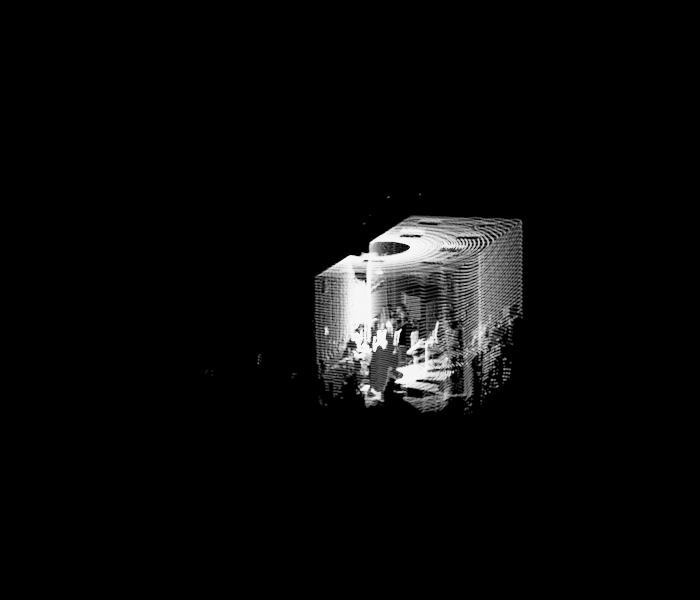

In [5]:
# control plot (in case of automatic execution)
plot = True
if plot == True:
    fig = plt.figure(figsize=(7,6), facecolor="black")
    ax = fig.add_subplot(projection='3d')

    # color variability off of 'a'
    color = False
    if color == True: # on/off
        normalized_a = a/max(a)
        colors = cm.hsv(normalized_a)
        colmap = cm.ScalarMappable(cmap=cm.hsv)
        colmap.set_array(a)

    # zoom control (RADIUS)
    radius = False # on/off
    if radius == True:
        RADIUS = 4  # Control this value.
        ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)

    # set viewing angle
    ax.view_init(elev=15, azim=290, roll=0)

    # create graph
    ax.scatter(x, y, z, marker=".", s=1, c="white", alpha=0.125)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_facecolor('black')
    ax.grid(False)
    ax.axis('off')

    plt.show()

In [6]:
points = []
for i in range(-10, 11):
    for j in range(-10, 11):
        for k in range(-10, 11):
            points.append([i*10,j*10,k*10])
        

In [7]:
point_sphere = pd.DataFrame(points)
point_sphere.columns

RangeIndex(start=0, stop=3, step=1)

In [8]:
x2 = point_sphere.iloc[:,0]
y2 = point_sphere.iloc[:,1]
z2 = point_sphere.iloc[:,2]

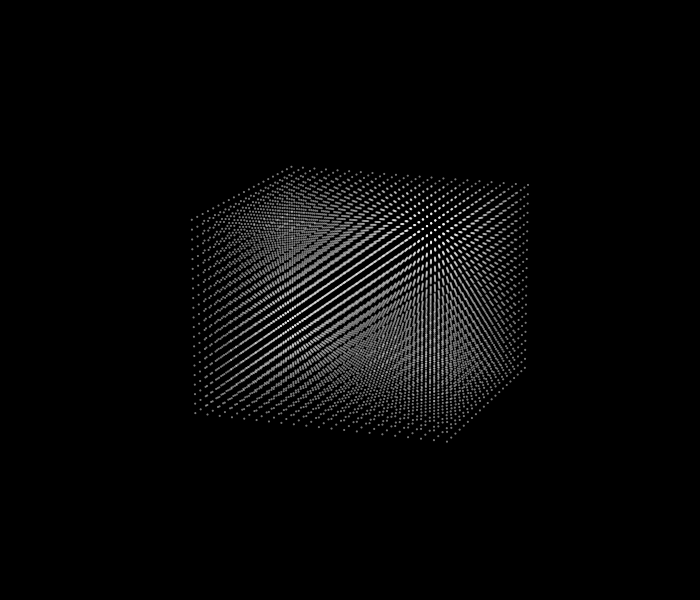

In [9]:
# control plot (in case of automatic execution)
plot = True
if plot == True:
    fig = plt.figure(figsize=(7,6), facecolor="black")
    ax = fig.add_subplot(projection='3d')

    # color variability off of 'a'
    color = False
    if color == True: # on/off
        normalized_a = a/max(a)
        colors = cm.hsv(normalized_a)
        colmap = cm.ScalarMappable(cmap=cm.hsv)
        colmap.set_array(a)

    # zoom control (RADIUS)
    radius = False # on/off
    if radius == True:
        RADIUS = 4  # Control this value.
        ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)

    # set viewing angle
    ax.view_init(elev=15, azim=290, roll=0)

    # create graph
    ax.scatter(x2, y2, z2, marker=".", s=1, c="white", alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_facecolor('black')
    ax.grid(False)
    ax.axis('off')

    plt.show()

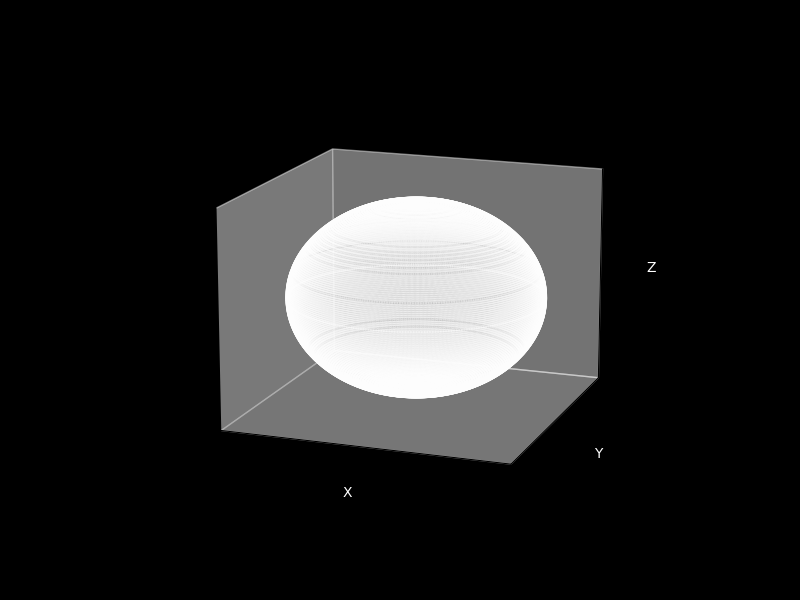

In [10]:
import math
import numpy as np

points = []
R = 1
density = 100
N = math.ceil(density*R*math.pi)


def base_circle(radius, num_points, z=0, base=False):
    # y (height) maps to x (radius)
    base_dict = {}
    for i in range(1, num_points + 1):
        theta = i/num_points
        x = radius * math.cos(theta*2*math.pi)
        y = radius * math.sin(theta*2*math.pi)
        points.append([x,y,z])
        if base == True:
            base_dict[y] = x
    
    return base_dict


rosetta_circle = base_circle(radius=1, num_points=(N-1), base=True)

# key, val --> z, r
for Z, R in rosetta_circle.items():
    base_circle(radius=R, z=Z, num_points=N) 
    
point_sphere = pd.DataFrame(points)
x3 = point_sphere.iloc[:,0]
y3 = point_sphere.iloc[:,1]
z3 = point_sphere.iloc[:,2]

# control plot (in case of automatic execution) ------------------------------------------------------------------
plot = True
if plot == True:
    
    # COLOR CONTROL -- foreground, background --------------------------------------------------------------------
    fg = "white"
    bg = "black"
    
    fig = plt.figure(figsize=(8,6), facecolor="black")
    ax = fig.add_subplot(projection='3d')

    # color variability off of 'a' -------------------------------------------------------------------------------
    color = False
    if color == True: # on/off
        normalized_a = a/max(a)
        colors = cm.hsv(normalized_a)
        colmap = cm.ScalarMappable(cmap=cm.hsv)
        colmap.set_array(a)

    # ZOOM CONTROL ----------------------------------------------------------------------------------------------
    radius = False # on/off
    if radius == True:
        RADIUS = 4  # adjust this value
        ax.set_xlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_zlim3d(-RADIUS / 2, RADIUS / 2)
        ax.set_ylim3d(-RADIUS / 2, RADIUS / 2)

    # VIEWING ANGLE ---------------------------------------------------------------------------------------------
    ax.view_init(elev=15, azim=290, roll=0)
    
    # create graph ----------------------------------------------------------------------------------------------
    ax.scatter(x3, y3, z3, marker=".", s=1, c=fg, alpha=0.5)
    
    # SET AXES LABELS ------------------------------------------------------------------------------------------- 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # SET AXES COLORS -------------------------------------------------------------------------------------------
    ax.spines['bottom'].set_color(fg)
    ax.spines['top'].set_color(fg)
    ax.spines['left'].set_color(fg)
    ax.spines['right'].set_color(fg)
    
    # AXES LABEL COLORS -----------------------------------------------------------------------------------------
    ax.xaxis.label.set_color(fg)
    ax.yaxis.label.set_color(fg)
    ax.zaxis.label.set_color(fg)
    
    # AXES TICKS ------------------------------------------------------------------------------------------------
    ax.tick_params(axis='x', colors=fg)
    ax.tick_params(axis='y', colors=fg)
    ax.tick_params(axis='z', colors=fg)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    # BACKGROUND ------------------------------------------------------------------------------------------------
    ax.set_facecolor(bg)
    ax.grid(visible=False, color=fg)
    ax.axis('on')

    plt.show()